### Konlpy basic - website(http://konlpy-ko.readthedocs.io/ko/v0.4.3/)

In [1]:
from konlpy.tag import Kkma  # 꼬꼬마 형태소 분석기 사용

kkma = Kkma()
text = "수능을 앞두고 날이 급격히 추워졌습니다. 기온이 오르는 속도도 더디고 옷깃을 파고드는 찬바람에 체감온도는 훨씬 더 낮은 상태입니다. 현재 서울 기온은 6.4도지만 찬바람 때문에 체감온도 3도 안팎을 가리키고 있습니다."

sentences = kkma.sentences(text)
for sentence in sentences:
    print(sentence)

수능을 앞두고 날이 급격히 추워 졌습니다.
기온이 오르는 속도도 더디고 옷깃을 파고드는 찬바람에 체감 온도는 훨씬 더 낮은 상태입니다.
현재 서울 기온은 6.4 도지만 찬바람 때문에 체감 온도 3도 안팎을 가리키고 있습니다.


In [2]:
kkma.nouns(text) #명사 어간만 뽑는다. 정확하지 않을 수 있다.

['수능',
 '날',
 '기온',
 '속도',
 '옷깃',
 '찬바람',
 '체감',
 '체감온도',
 '온도',
 '상태',
 '현재',
 '서울',
 '6.4',
 '6.4도지',
 '도지',
 '때문',
 '3',
 '3도',
 '도',
 '안팎']

In [3]:
pos_tag = kkma.pos(text)
print(pos_tag[:5])

[('수능', 'NNG'), ('을', 'JKO'), ('앞두', 'VV'), ('고', 'ECE'), ('날', 'NNG')]


- input 형태 = string

In [4]:
# NLTK처럼 내장 데이터를 불러올 수도 있음

from konlpy.corpus import kolaw
fids = kolaw.fileids()
fids

['constitution.txt']

# 문재인 대통령 2017.06.12. 국회 시정연설 전문

## 실제 data 에 대해 문장 단위로 나눠보고 Pos tagging 해보기

In [6]:
with open('moon_170612.txt', 'r') as f:
    lines = f.read().splitlines()
print(lines[:5])

['존경하는 국민 여러분, 정세균 국회의장님과 의원 여러분. 19대 국회 때 바로 이 자리에서 당대표 연설을 했습니다. 20대 국회에서 인사드리는 것은 처음이지만, 19대 국회에서 함께 활동했던 분들이 많아서 친근한 동료의식을 갖고 있습니다.', '', '지난 5월 10일, 저는 국회에서 엄숙한 마음으로 대통령 취임선서를 했습니다. 오늘은 정부가 추가경정예산안을 편성한 이유와 주요 내용을 직접 설명드리고 의원 여러분의 이해와 협조를 부탁드리고자 이 자리에 섰습니다.', '', '역대 가장 빠른 시기의 시정연설이자 사상 최초의 추경시정연설이라고 들었습니다. 국회와 더 긴밀하게 소통하고 협치하고자하는 저의 노력으로 받아들여주십시오. 그러나 그 보다 더 주목해주시기를 바라는 것은 일자리 추경의 절박성과 시급성입니다.']


In [7]:
# 빈 문장 '' 제거  / 빈칸이면 무시하고 출력해라.
sentences = [line for line in lines if line != '']


for line in lines[:5]:
    if line != '':
        print(line)

존경하는 국민 여러분, 정세균 국회의장님과 의원 여러분. 19대 국회 때 바로 이 자리에서 당대표 연설을 했습니다. 20대 국회에서 인사드리는 것은 처음이지만, 19대 국회에서 함께 활동했던 분들이 많아서 친근한 동료의식을 갖고 있습니다.
지난 5월 10일, 저는 국회에서 엄숙한 마음으로 대통령 취임선서를 했습니다. 오늘은 정부가 추가경정예산안을 편성한 이유와 주요 내용을 직접 설명드리고 의원 여러분의 이해와 협조를 부탁드리고자 이 자리에 섰습니다.
역대 가장 빠른 시기의 시정연설이자 사상 최초의 추경시정연설이라고 들었습니다. 국회와 더 긴밀하게 소통하고 협치하고자하는 저의 노력으로 받아들여주십시오. 그러나 그 보다 더 주목해주시기를 바라는 것은 일자리 추경의 절박성과 시급성입니다.


In [8]:
# komoran을 이용한 형태소 분석

from konlpy.tag import Komoran
tagger = Komoran()
tags = tagger.pos(sentences[0])

# 함수 이름 찾을 때 tags = tagge.p 하고 tab키 누르면 알 수 있다. 패키지 마다 함수 이름이 다를 수 있기 때문에 확인하려면...

print(tags[:4])

[('존경', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('국민', 'NNG')]


In [10]:
tagged_sentences = [tagger.pos(sent) for sent in sentences]
tagged_sentences[0]

[('존경', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('국민', 'NNG'),
 ('여러분', 'NP'),
 (',', 'SP'),
 ('정세균', 'NNP'),
 ('국회의장', 'NNP'),
 ('님', 'XSN'),
 ('과', 'JC'),
 ('의원', 'NNG'),
 ('여러분', 'NP'),
 ('.', 'SF'),
 ('19', 'SN'),
 ('대', 'NNB'),
 ('국회', 'NNG'),
 ('때', 'NNG'),
 ('바로', 'MAG'),
 ('이', 'MM'),
 ('자리', 'NNG'),
 ('에서', 'JKB'),
 ('당', 'NNG'),
 ('대표', 'NNG'),
 ('연설', 'NNG'),
 ('을', 'JKO'),
 ('하', 'VV'),
 ('았', 'EP'),
 ('습니다', 'EF'),
 ('.', 'SF'),
 ('20', 'SN'),
 ('대', 'NNB'),
 ('국회', 'NNG'),
 ('에서', 'JKB'),
 ('인사', 'NNG'),
 ('드리', 'VV'),
 ('는', 'ETM'),
 ('것', 'NNB'),
 ('은', 'JX'),
 ('처음', 'NNG'),
 ('이', 'VCP'),
 ('지만', 'EC'),
 (',', 'SP'),
 ('19', 'SN'),
 ('대', 'NNB'),
 ('국회', 'NNG'),
 ('에서', 'JKB'),
 ('함께', 'MAG'),
 ('활동', 'NNG'),
 ('하', 'XSV'),
 ('았', 'EP'),
 ('던', 'ETM'),
 ('분', 'NNB'),
 ('들', 'XSN'),
 ('이', 'JKS'),
 ('많', 'VA'),
 ('아서', 'EC'),
 ('친근', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('동료', 'NNG'),
 ('의식', 'NNG'),
 ('을', 'JKO'),
 ('갖', 'VV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('습니다', 'EF

In [11]:
# 명사 리스트 만들어 보기 / 태그가 NNP, NNG로 시작하는 명사를 리스트
noun_list = []

for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
noun_list[:10]

['존경', '국민', '정세균', '국회의장', '의원', '국회', '때', '자리', '당', '대표']

In [12]:
# collection library를 이용하여 빈도수 계산하기
from collections import Counter

noun_counts = Counter(noun_list)
noun_counts.most_common(20)

[('일자리', 44),
 ('청년', 28),
 ('국민', 24),
 ('예산', 22),
 ('정부', 20),
 ('추경', 18),
 ('국회', 15),
 ('소득', 12),
 ('고용', 11),
 ('계층', 10),
 ('일', 9),
 ('이번', 9),
 ('지원', 9),
 ('의원', 8),
 ('국가', 8),
 ('민간', 8),
 ('취업', 7),
 ('중소기업', 7),
 ('창업', 7),
 ('민생', 7)]

### stop-words 리스트를 만들고 stop-words가 제거된 명사 리스트를 만들기.

In [13]:
noun_list1 = []
stop_words = ['일자리',"청년"]
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            if word not in stop_words:
                noun_list1.append(word)

In [14]:
import collections

noun_counts = collections.Counter(noun_list1)
noun_counts.most_common(10) # '일자리'과 '청년'이 없어짐을 확인할 수 있음

[('국민', 24),
 ('예산', 22),
 ('정부', 20),
 ('추경', 18),
 ('국회', 15),
 ('소득', 12),
 ('고용', 11),
 ('계층', 10),
 ('일', 9),
 ('이번', 9)]

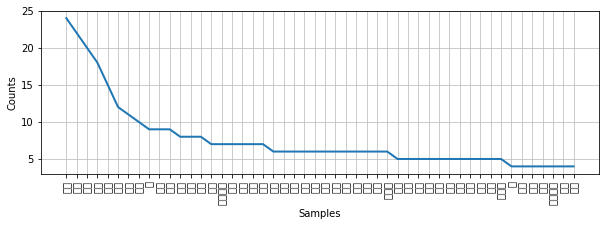

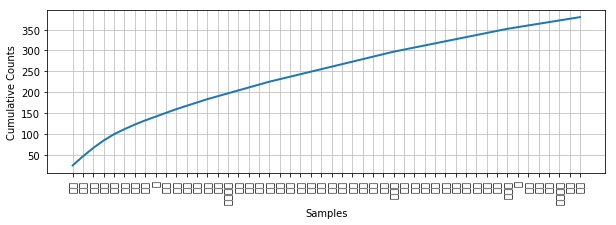

In [15]:
import nltk
import matplotlib.pyplot as plt # 결과를 시각화 하기 위한 matplotlib
%matplotlib inline

# word index 대신 word를 보여주는 그래프
freqdist = nltk.FreqDist(noun_counts)

plt.figure(figsize=(10,3))
freqdist.plot(50)

plt.figure(figsize=(10,3))
freqdist.plot(50,cumulative=True)

In [16]:
# 폰트 해결 / 네모를 해결해줌
from matplotlib import font_manager, rc
font_fname = '/Library/Fonts/AppleGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

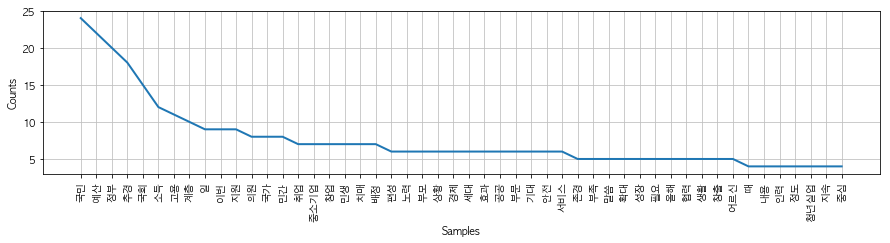

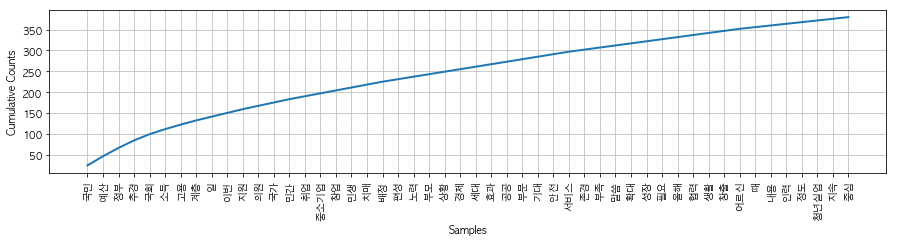

In [18]:
plt.figure(figsize=(15,3))
freqdist.plot(50)

plt.figure(figsize=(15,3))
freqdist.plot(50,cumulative=True)

In [19]:
# unique한 명사 리스트 만들기

unique_nouns = set()
unique_list = []

for sent in tagged_sentences:
    for word, tag in sent:
        if tag in ['NNP','NNG']:
            if word not in unique_list:
                unique_list.append(word)
                
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            unique_nouns.add(word)

unique_nouns = list(unique_nouns)
noun_index = {noun: i for i, noun in enumerate(unique_nouns)} # 딕셔너리 형태의 자료구조
noun_index

{'5월 10일': 178,
 '가구': 202,
 '가래': 245,
 '가속': 208,
 '가슴': 230,
 '가운데': 279,
 '가정': 505,
 '가족': 445,
 '가축': 522,
 '각오': 107,
 '간격': 351,
 '감당': 25,
 '감독관': 331,
 '감사': 44,
 '감소': 396,
 '감안': 235,
 '감정노동': 92,
 '강화': 156,
 '개선': 38,
 '거리': 478,
 '거주': 313,
 '걱정거리': 511,
 '건강': 170,
 '검진': 376,
 '격차': 497,
 '결과': 78,
 '경기': 103,
 '경력': 145,
 '경륜': 213,
 '경우': 405,
 '경쟁력': 361,
 '경제': 163,
 '경제위기': 359,
 '경제지표': 333,
 '경찰관': 290,
 '경험': 271,
 '계속': 413,
 '계층': 56,
 '고려': 345,
 '고령화': 215,
 '고생': 315,
 '고용': 21,
 '고통': 297,
 '공공': 423,
 '공급': 369,
 '공동': 329,
 '공무원': 437,
 '공백': 523,
 '공부': 430,
 '공약': 411,
 '공제': 528,
 '공통': 466,
 '공포': 66,
 '과로사': 395,
 '과세': 293,
 '과정': 415,
 '과제': 121,
 '관': 3,
 '관련': 285,
 '관리': 260,
 '교대': 104,
 '교부': 179,
 '교부금': 32,
 '교사': 238,
 '교육': 250,
 '구급대원': 375,
 '구의역': 6,
 '구조': 167,
 '구직': 196,
 '구체': 291,
 '국가': 142,
 '국공립': 327,
 '국민': 222,
 '국정': 54,
 '국채': 7,
 '국회': 454,
 '국회의원': 474,
 '국회의장': 302,
 '군구': 226,
 '군무원': 401,
 '규모': 274,
 '극대': 448,
 '근로

### 문장-단어 행렬

In [20]:
import numpy as np
# 문장 길이 X 명사 종류 matrix 생성
occurs = np.zeros([len(tagged_sentences), len(unique_nouns)])
np.shape(occurs)

(71, 565)

In [21]:
for i, sent in enumerate(tagged_sentences):
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurs[i][index] = 1  # 문장 i의 index 자리에 1을 채워 넣는다.
            
occurs[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0

In [22]:
# 공존 단어 행렬 계산
# i 번째 단어
co_occurs = occurs.T.dot(occurs)

In [23]:
for i in range(100):
    for j in range(100):
        if (co_occurs[i][j] > 1) & (i>j):
            print(unique_nouns[i], unique_nouns[j], co_occurs[i][j])

계층 고용 2.0
서비스 고용 2.0
서비스 인력 2.0
세대 에코 2.0
지원 고용 2.0
지원 창출 2.0
소득 고용 2.0
소득 계층 2.0
정도 실정 2.0


##  

### 네트워크 그리기

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
#네트워크를 다운 받아야 함

import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 4:
            graph.add_edge(unique_nouns[i], unique_nouns[j])

In [26]:
krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
plt.rc('font',**krfont)

/Users/nanhee/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/nanhee/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/nanhee/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/nanhee/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

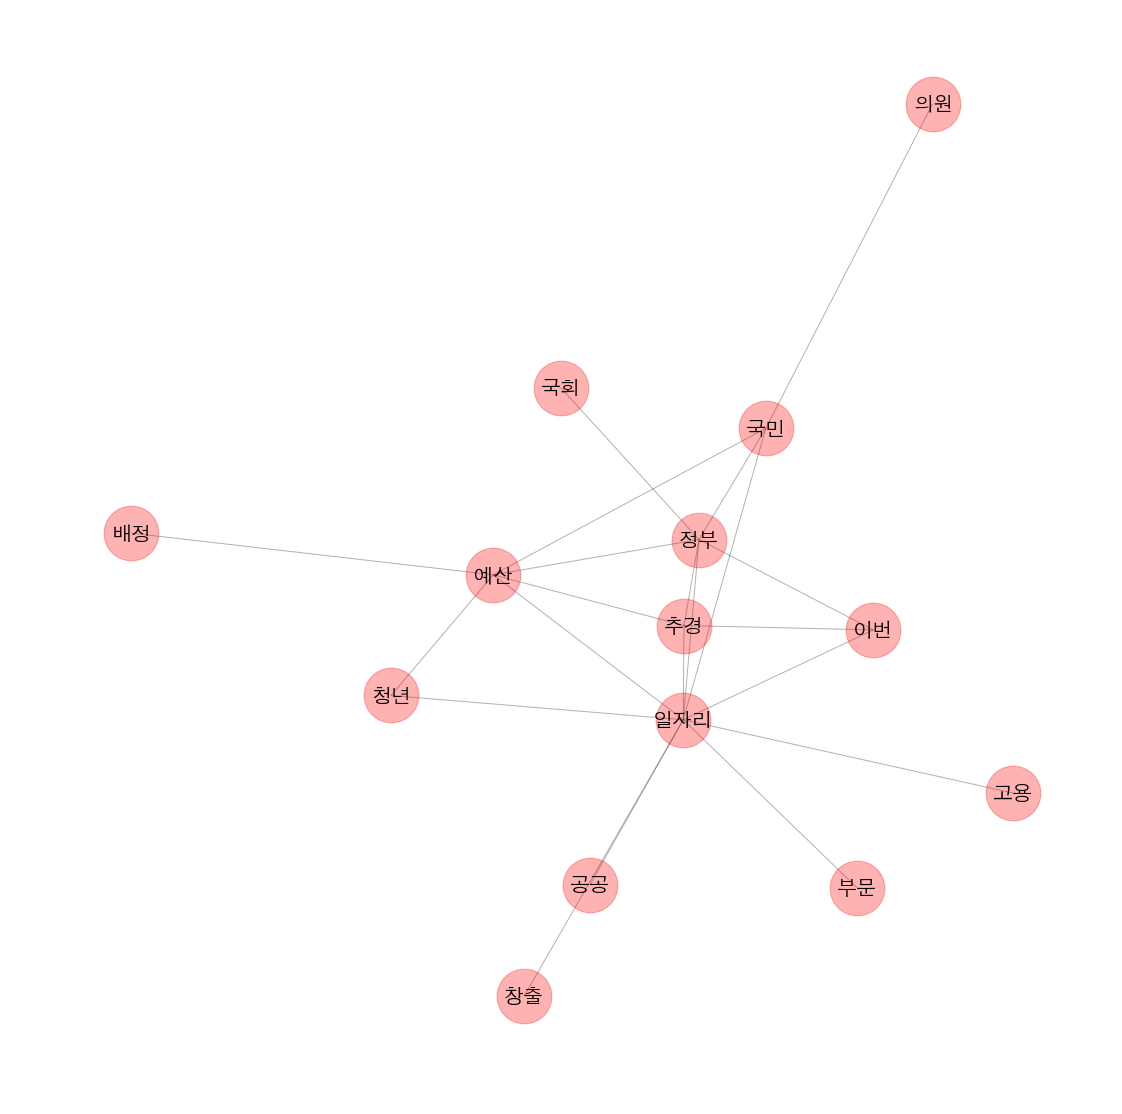

In [28]:
plt.figure(figsize=(15, 15))
layout = nx.spring_layout(graph, k=.1)
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family='AppleGothic',
        alpha=0.3, node_size=3000)
plt.show()